# When does the Power Law break down?

Power law holds for single words. It holds for 2-grams. Does it hold for all n-grams?

In [191]:
import pandas as pd 
import requests 


#Wocka Joke database
url = "https://raw.githubusercontent.com/taivop/joke-dataset/master/wocka.json"
jokes_df = pd.read_json(url)

#extract only the body of the joke
jokes_df = jokes_df["body"]


jokes_df = jokes_df.str.replace(r'|[^0-9a-zA-Z\s]+', '', regex=True) # Remove the puncutations
jokes_df = jokes_df.str.lower() # Make lower case
jokes_df = jokes_df[~jokes_df.str.contains("inkinkinkinkinkinkinkinkinkinkinkinkinkinkinkinkinkinkinkink")]

def string_to_list(s : str) -> list[list[str]]:
    lists = s.split("\r\n\r\n")
    words = list(map(lambda x : x.split(), lists))
    return words 

#Convert the list of text to strings
jokes_df = jokes_df.apply(string_to_list)

In [192]:
##Preprocessing
jokes_list = jokes_df.to_list()
flattened_jokes_list = [x for l in jokes_list for x in l]

In [193]:

def get_ngram_count(word_lists : str, n : int = 1) -> dict[str,int]:
    ngram_count = {}
    for word_list in word_lists:
        ngrams = [word_list[i:i+n] for i in range(0, len(word_list)-(n-1), 1)]
        for ngram in ngrams:
            s = " ".join(ngram)
            if s not in ngram_count: ngram_count[s] = 0
            ngram_count[s] += 1
    return ngram_count

In [194]:
import numpy as np

def fit_power(y):
    n = len(y)
    x = np.arange(start=1,stop=n+1)

    lnx = np.log(x)
    lny = np.log(y)
    num = n * np.sum(np.multiply(lnx,lny)) - np.sum(lnx) * np.sum(lny)
    den = n * np.sum(np.power(lnx,2)) - np.power(np.sum(lnx),2)
    b = num/den 

    a = np.exp((np.sum(lny)-b*(np.sum(lnx)))/n)

    return a, b

In [205]:
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as stats 

def plot_ngram(n):
    ngram = get_ngram_count(flattened_jokes_list, n)
    lists = sorted(ngram.items(), key=lambda x: x[1], reverse=True)
    x, y = zip(*lists)

    N = 100
    X = x[:N]
    Y = y[:N]
    Z = np.arange(0,N)
    a,b = fit_power(Y)
    print(a,b)
    Z_y = a * np.power(Z+1, b)

    plt.figure(figsize=(10,4))
    plt.xticks(ticks=range(len(X)), labels=[v if i%(5*n) == 0 else '' for i, v in enumerate(X)])
    plt.bar(X, Y)
    plt.plot(Z,Z_y,c='r')
    plt.show()

    for i in range(10):
        print(X[i],"\t",Y[i])

    K_S = stats.kstest(Y,Z_y)
    return K_S

77865.8960575053 -0.8515001041727353


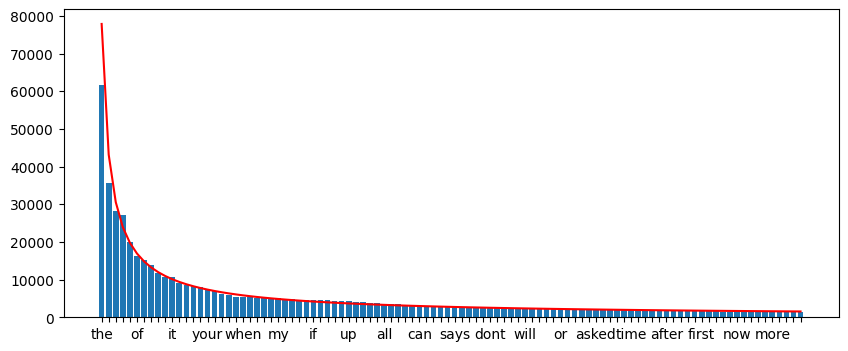

the 	 61593
a 	 35615
to 	 28147
and 	 27226
you 	 19980
of 	 16297
in 	 15301
i 	 13782
is 	 11722
he 	 10601


KstestResult(statistic=0.13, pvalue=0.36818778606286096, statistic_location=1542.0, statistic_sign=1)

In [206]:
plot_ngram(1)

4563.361528300524 -0.506238114799558


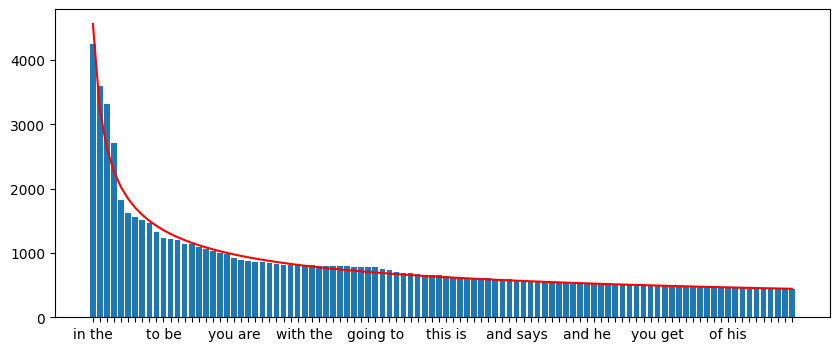

in the 	 4248
of the 	 3592
to the 	 3323
on the 	 2716
in a 	 1819
at the 	 1624
do you 	 1559
and the 	 1513
if you 	 1468
the man 	 1329


KstestResult(statistic=0.08, pvalue=0.9084105017744525, statistic_location=765.5822872539135, statistic_sign=-1)

In [207]:
plot_ngram(2)

532.3176840832847 -0.3695437584300978


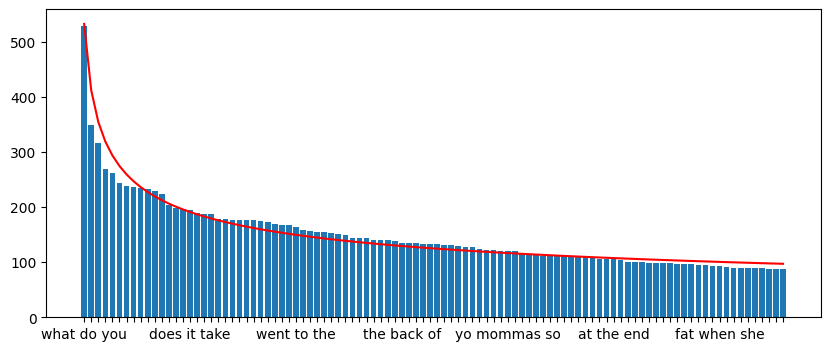

what do you 	 529
out of the 	 349
one of the 	 316
do you call 	 269
in front of 	 262
how do you 	 243
the next day 	 238
there was a 	 237
id love to 	 235
the difference between 	 232


KstestResult(statistic=0.16, pvalue=0.1548386665118475, statistic_location=97.0, statistic_sign=1)

In [208]:
plot_ngram(3)

270.3159375138584 -0.39361282943793224


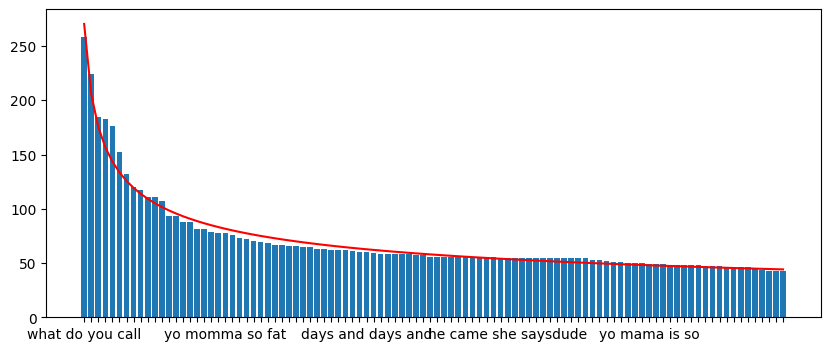

what do you call 	 258
id love to but 	 224
does it take to 	 185
do you call a 	 183
it is illegal to 	 176
whats the difference between 	 152
yo momma is so 	 132
q what do you 	 120
in the middle of 	 117
the difference between a 	 111


KstestResult(statistic=0.15, pvalue=0.21117008625127576, statistic_location=54.67184999849967, statistic_sign=-1)

In [209]:
plot_ngram(4)

204.28288934423213 -0.44452469388539007


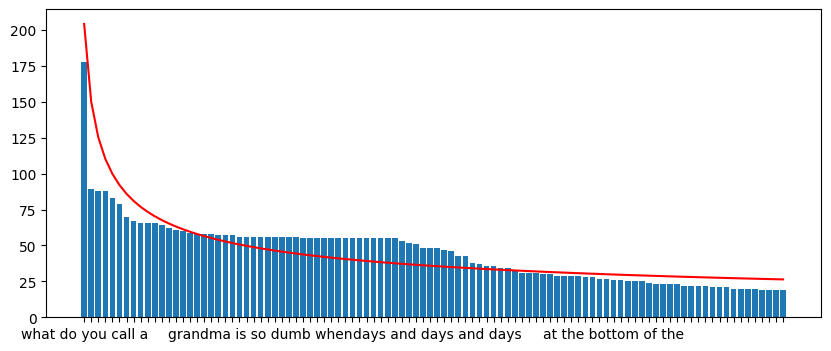

what do you call a 	 178
q what do you call 	 89
does it take to change 	 88
it take to change a 	 88
whats the difference between a 	 83
id love to but i 	 79
in the middle of the 	 70
does it take to screw 	 67
yo momma is so fat 	 66
it take to screw in 	 66


KstestResult(statistic=0.26, pvalue=0.002219935934558366, statistic_location=50.68860537095005, statistic_sign=-1)

In [210]:
plot_ngram(5)

246.5728957563721 -0.6199359996612663


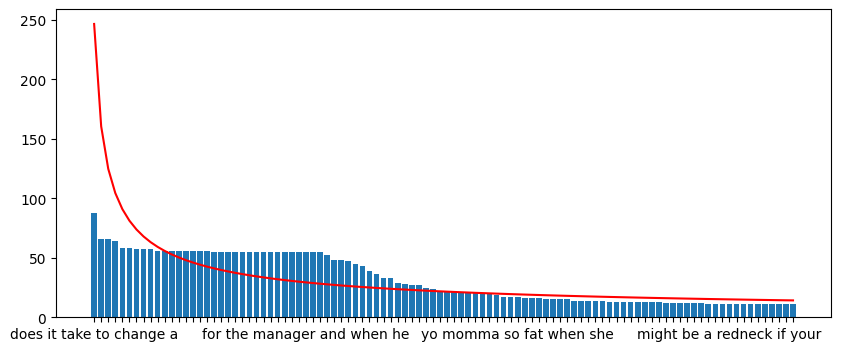

does it take to change a 	 88
does it take to screw in 	 66
it take to screw in a 	 66
q what do you call a 	 64
when she got locked in the 	 58
you might be a redneck if 	 58
is so dumb when she got 	 57
so dumb when she got locked 	 57
dumb when she got locked in 	 57
yo momma not grandma is so 	 56


KstestResult(statistic=0.32, pvalue=6.281176788972264e-05, statistic_location=14.0, statistic_sign=1)

In [211]:
plot_ngram(6)

267.31514063422617 -0.7221747530183105


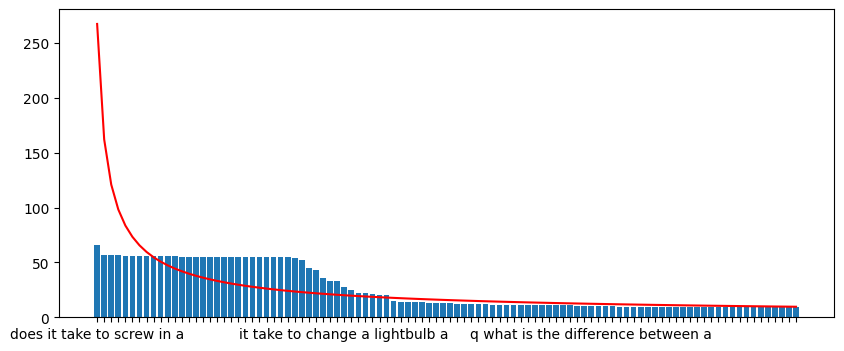

does it take to screw in a 	 66
is so dumb when she got locked 	 57
so dumb when she got locked in 	 57
dumb when she got locked in the 	 57
yo momma not grandma is so dumb 	 56
momma not grandma is so dumb when 	 56
not grandma is so dumb when she 	 56
grandma is so dumb when she got 	 56
when she got locked in the telephone 	 56
she got locked in the telephone store 	 56


In [202]:
plot_ngram(7)